In [ ]:
# !pip install matplotlib==3.4.3
# !pip install --upgrade statsmodels

In [1]:
# Importing the necessary packages
import numpy as np  # "Scientific computing"
import scipy.stats as stats  # Statistical tests

import random
import math

import pandas as pd  # Data Frame
from pandas.api.types import CategoricalDtype

import matplotlib.pyplot as plt  # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic diagram
import seaborn as sns  # Advanced data visualisation

C:\Users\nealj\AppData\Local\Temp\ipykernel_34144\4100569458.py:8: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd  # Data Frame


### Exercise 1

The file lightbulbs.csv contains a random sample of
100 lightbulb lifetimes. The company that produces
these lightbulbs wants to know whether it can claim
that its lightbulbs typically last more than 1000 burning
hours.
1. Identify the null and alternative hypotheses for this
situation.
2. Can this lightbulb manufacturer claim that its
lightbulbs typically last more than 1000 hours at
the 5% significance level? What about at the 1%
significance level?


In [2]:
df = pd.read_csv(
    "https://raw.githubusercontent.com/HoGentTIN/dsai-en-labs/main/data/Lightbulbs.csv",
    sep=";",
)


df.head()

,Lightbulb,Lifetime
0,1,840.08
1,2,960.00
2,3,953.38
3,4,981.14
4,5,938.66


In [8]:
# H0: de lampen hebben geen brandduur van meer dan 1000 uur
# H1: de lampen hebben een brandduur van meer dan 1000 uur
alpha = 0.05

n = 100  # Sample size
mu = 1000  # Population average
sigma = df.Lifetime.std()  # Sample stdev
m_sample = df.Lifetime.mean()  # Sample mean
p = stats.norm.cdf(m_sample, loc=mu, scale=sigma / np.sqrt(n))


g = stats.t.isf(alpha, loc=mu, scale=sigma / np.sqrt(n), df=n - 1)

print(f"sample mean: {m_sample}")
print("p-value: %.5f" % p)
if p < alpha:
    print("p < a, reject H0")
else:
    print("p > a, do not reject H0")
print(f"critical val: {g}")

sample mean: 991.0186000000001
p-value: 0.15142
p > a, do not reject H0
critical val: 1014.4732832388225


### Exercise 2

The file Low calorie soft drinks.csv categorizes 250 randomly
selected consumers on the basis of their gender, their
age, and their preference for our brand or a competitor's
brand of a low-calorie soft drink.   
First make a stacked barplot.  
Then use a test to see whether the drink
preference is independent of gender.

In [2]:
df = pd.read_csv(
    "https://raw.githubusercontent.com/HoGentTIN/dsai-en-labs/main/data/Low%20calorie%20soft%20drinks.csv",
    sep=";",
)


df.head()

,Consumer,Gender,Age,Preference
0,1,F,Over 60,Our brand
1,2,F,Between 40 and 60,Our brand
2,3,M,Between 40 and 60,Our brand
3,4,F,Over 60,Competing brand
4,5,M,Between 20 and 40,Our brand


<Axes: xlabel='Gender'>

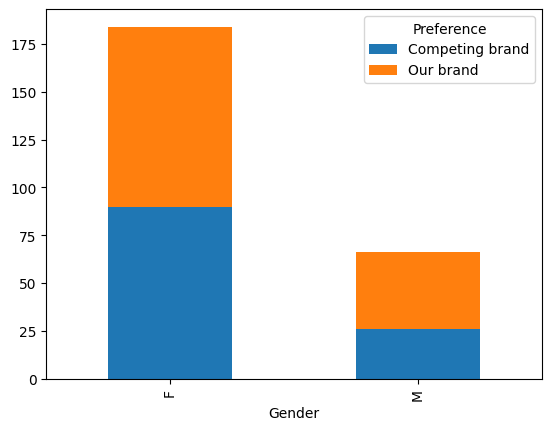

In [14]:
observed = pd.crosstab(df.Gender, df.Preference)
observed
observed.plot(kind="bar", stacked=True)

In [ ]:
# H0: er is geen verschil in voorkeur per geslacht
# H1: er is een verschil in voorkeur per geslacht

In [15]:
alpha = 0.05
dimensions = observed.shape
chi2, p, dof, expected = stats.chi2_contingency(observed)

print("Chi-squared        : %.4f" % chi2)
print("Degrees of freedom : %d" % dof)

# Calculate critical value
g = stats.chi2.isf(alpha, df=dof)
print("Critical value     : %.4f" % g)

# Calculate p-value
p = stats.chi2.sf(chi2, df=dof)
print("p-value            : %.4f" % p)

Chi-squared        : 1.4078
Degrees of freedom : 1
Critical value     : 3.8415
p-value            : 0.2354


In [ ]:
# Besluit: er is geen significant verschil in voorkeur per geslacht

# Exercise 3
The owner of Original Italian Pizza restaurant chain
wants to understand which variable most strongly
influences the sales of his specialty deep-dish
pizza. He has gathered data on the monthly sales of
deep-dish pizzas at his restaurants and observations on
other potentially relevant variables for each of several
outlets in central Indiana. These data are provided in
the file pizzas.csv. Estimate a simple linear regression
equation between the quantity sold (Y) and each
of the following candidates for the best explanatory
variable: average price of deep-dish pizzas, monthly
advertising expenditures, and disposable income per
household in the areas surrounding the outlets. Which
variable is most strongly associated with the number
of pizzas sold? Explain your choice.  
Start by transforming the text values to a float. Divide Quantity Sold, Monthly Advertising Expenditures and Disposable Income Per Househols by 100.  
Make a plot  

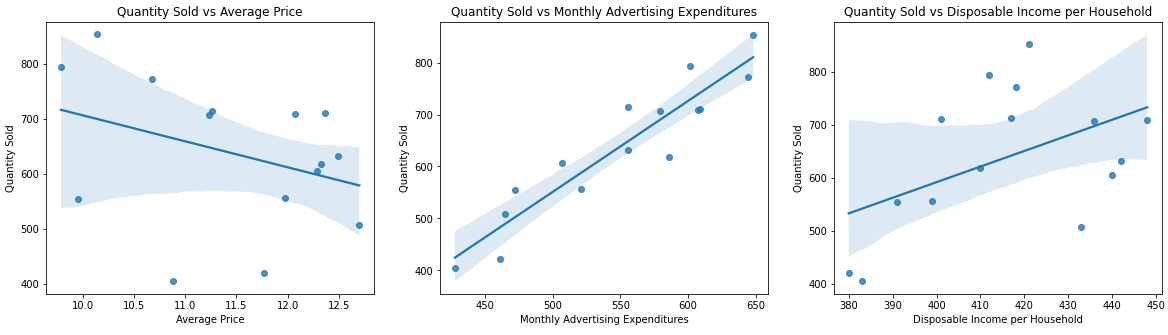

In [27]:
df = pd.read_csv(
    "https://raw.githubusercontent.com/HoGentTIN/dsai-en-labs/main/data/pizzas.csv",
    sep=";",
)


df.head()

,Outlet Number,Quantity Sold,Average Price,Monthly Advertising Expenditures,Disposable Income per Household
0,1,85 300,"$10,14",$64 800,$42 100
1,2,40 500,"$10,88",$42 800,$38 300
2,3,61 800,"$12,33",$58 600,$41 000
3,4,50 800,"$12,70",$46 500,$43 300
4,5,60 600,"$12,29",$50 700,$44 000


In [28]:
# Data cleanup
# Quantity sold to int
df["Quantity Sold"] = df["Quantity Sold"].str.replace(" ", "")
df["Quantity Sold"] = df["Quantity Sold"].astype(int)
df["Quantity Sold"] = df["Quantity Sold"] / 100

# Remove $ sign from Average Price
df["Average Price"] = df["Average Price"].str.replace("$", "")
# Remove dots
df["Average Price"] = df["Average Price"].str.replace(",", ".")
df["Average Price"] = df["Average Price"].astype(float)

# Remove $ sign from MAE
df["Monthly Advertising Expenditures"] = df[
    "Monthly Advertising Expenditures"
].str.replace("$", "")
# Remove space
df["Monthly Advertising Expenditures"] = df[
    "Monthly Advertising Expenditures"
].str.replace(" ", "")
df["Monthly Advertising Expenditures"] = df["Monthly Advertising Expenditures"].astype(
    int
)
df["Monthly Advertising Expenditures"] = df["Monthly Advertising Expenditures"] / 100

# Remove $ sign from DIpH
df["Disposable Income per Household"] = df[
    "Disposable Income per Household"
].str.replace("$", "")
# Remove space
df["Disposable Income per Household"] = df[
    "Disposable Income per Household"
].str.replace(" ", "")
df["Disposable Income per Household"] = df["Disposable Income per Household"].astype(
    int
)
df["Disposable Income per Household"] = df["Disposable Income per Household"] / 100

df.head(10)

,Outlet Number,Quantity Sold,Average Price,Monthly Advertising Expenditures,Disposable Income per Household
0,1,853.0,10.14,648.0,421.0
1,2,405.0,10.88,428.0,383.0
2,3,618.0,12.33,586.0,410.0
3,4,508.0,12.70,465.0,433.0
4,5,606.0,12.29,507.0,440.0
5,6,794.0,9.79,601.0,412.0
6,7,714.0,11.26,556.0,417.0
7,8,707.0,11.23,579.0,436.0
8,9,556.0,11.97,521.0,399.0
9,10,709.0,12.07,607.0,448.0


R  ≈ -0.3502
R² ≈ 0.1226


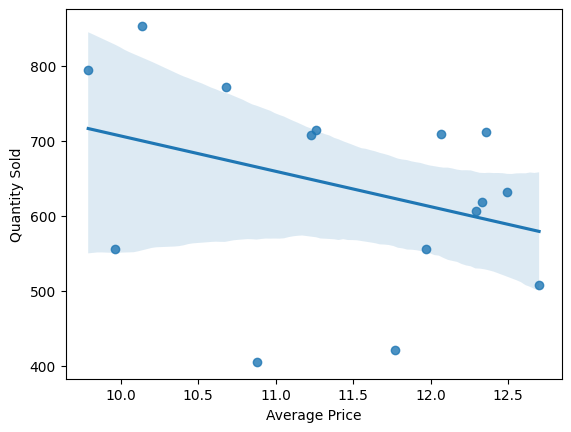

In [35]:
g1 = sns.regplot(data=df, x="Average Price", y="Quantity Sold")

# Python function numpy.corrcoef() - returns a matrix, like numpy.cov()
cor = np.corrcoef(df["Average Price"], df["Quantity Sold"])[0][1]
print(f"R  ≈ {cor:.4f}")
print(f"R² ≈ {cor**2:.4f}")

R  ≈ 0.9340
R² ≈ 0.8723


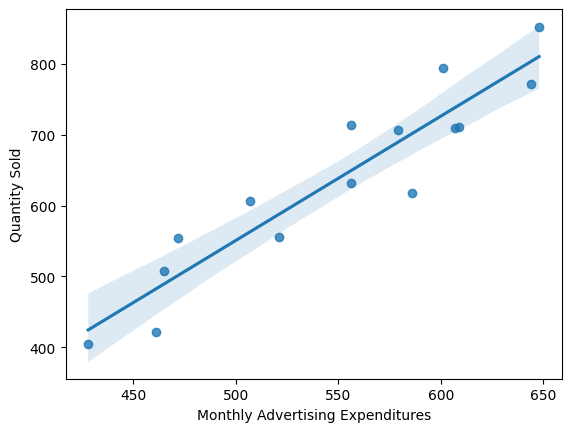

In [36]:
g2 = sns.regplot(data=df, x="Monthly Advertising Expenditures", y="Quantity Sold")

# Python function numpy.corrcoef() - returns a matrix, like numpy.cov()
cor = np.corrcoef(df["Monthly Advertising Expenditures"], df["Quantity Sold"])[0][1]
print(f"R  ≈ {cor:.4f}")
print(f"R² ≈ {cor**2:.4f}")

R  ≈ 0.4835
R² ≈ 0.2338


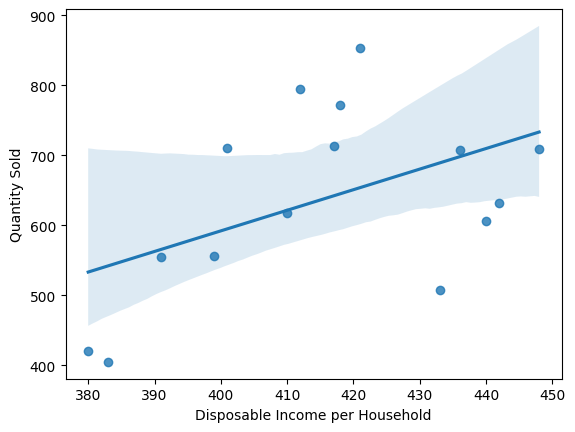

In [37]:
g3 = sns.regplot(data=df, x="Disposable Income per Household", y="Quantity Sold")

# Python function numpy.corrcoef() - returns a matrix, like numpy.cov()
cor = np.corrcoef(df["Disposable Income per Household"], df["Quantity Sold"])[0][1]
print(f"R  ≈ {cor:.4f}")
print(f"R² ≈ {cor**2:.4f}")

R indicates an increasing and very strong linear relation between Monthly Advertising Expenditures and Quantity Sold.